<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/intro-Machine-Learning/blob/main/classes/class_16_end_to_end_1/class_16_end_to_end_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/marco-canas/intro-Machine-Learning/blob/main/classes/class_16_end_to_end_1/class_16_end_to_end_1.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table> 

# Clase 16 End to end Parte 1

## Objetivo:  

Trabajar en un ejemplo de proyecto de principio a fin, pretendiendo ser un científico de datos contratado recientemente en una empresa inmobiliaria. 

# Get the data

In [22]:
import pandas as pd
housing = pd.read_csv('housing.csv')

In [ ]:
housing

In [ ]:
housing.head()

In [ ]:
housing.tail()

# Un vistazo a ellos

Hay 10 atributos (puedes ver los primeros 9 en la captura de pantalla):    
* `longitude`, 
* `latitude`, 
* `housing_median_age`, 
* `total_rooms`, 
* `total_bedrooms`, 
* `population`, 
* `households`, 
* `median_income`, 
* `median_house_value`, y 
* `ocean_proximity`.

El método `info()` es útil para obtener una descripción rápida de los datos, en particular 
* el número total de filas,   
* el tipo de cada atributo y   
* el número de valores `no nulos`

In [ ]:
housing.info() 

Hay 20,640 instancias en el conjunto de datos, 
* lo que significa que es bastante pequeño para los estándares de Machine Learning, 
* pero es perfecto para comenzar.

* Observe que el atributo `total_bedrooms` tiene solo 20,433 valores no nulos, 
* lo que significa que 207 distritos carecen de esta característica.

Tendremos que ocuparnos de esto más tarde.

Todos los atributos son numéricos, excepto el campo `ocean_proximity`.

Su tipo es `object`, por lo que podría contener cualquier tipo de objeto Python.

Pero como cargó estos datos desde un archivo CSV, sabe que debe ser un atributo de texto.

Cuando miró las cinco filas superiores, probablemente notó que los valores en la columna `ocean_proximity` eran repetitivos, lo que significa que probablemente sea un atributo categórico.

Puede averiguar 
* qué categorías existen y   
* cuántos distritos pertenecen a cada categoría utilizando el método `value_counts()`:

In [ ]:
housing['ocean_proximity'].value_counts() 

Veamos los otros campos.

El método `describe()` muestra un resumen de los atributos numéricos.

In [5]:
housing.describe() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Las filas de 

* recuento (`count`), 
* media (`mean`),   
* mínima (`min`) y   
* máxima (`max`)  

se explican por sí mismas.

Tenga en cuenta que los valores nulos se ignoran (por ejemplo, el recuento de `total_bedrooms` es 20,433, no 20.640).

La fila `std` muestra la desviación estándar, que mide qué tan dispersos están los valores.

Las filas $25\%$, $50\%$ y $75\%$ muestran los percentiles correspondientes:   

* un percentil indica el valor por debajo del cual cae un porcentaje determinado de observaciones en 
  un grupo de observaciones.

Por ejemplo,  

* el 25% de los distritos tiene una "edad media de vivienda" (`housing_media_age`) menor de 18,   
* mientras que el 50% tiene menos de 29 y   
* el 75% tiene menos de 37.

Estos a menudo se denominan  

* percentil 25 (o primer cuartil), 
* mediana y 
* percentil 75 (o tercer cuartil).

Otra forma rápida de tener una idea del tipo de datos con los que está tratando es trazar un histograma para cada atributo numérico.

Un histograma muestra 

* el número de instancias (en el eje vertical) que tienen un rango de valores dado (en el eje horizontal).

Puede trazar este atributo a la vez, o puede llamar al método `hist()` en todo el conjunto de datos (como se muestra en el siguiente ejemplo de código), y trazará un histograma para cada atributo numérico. 

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

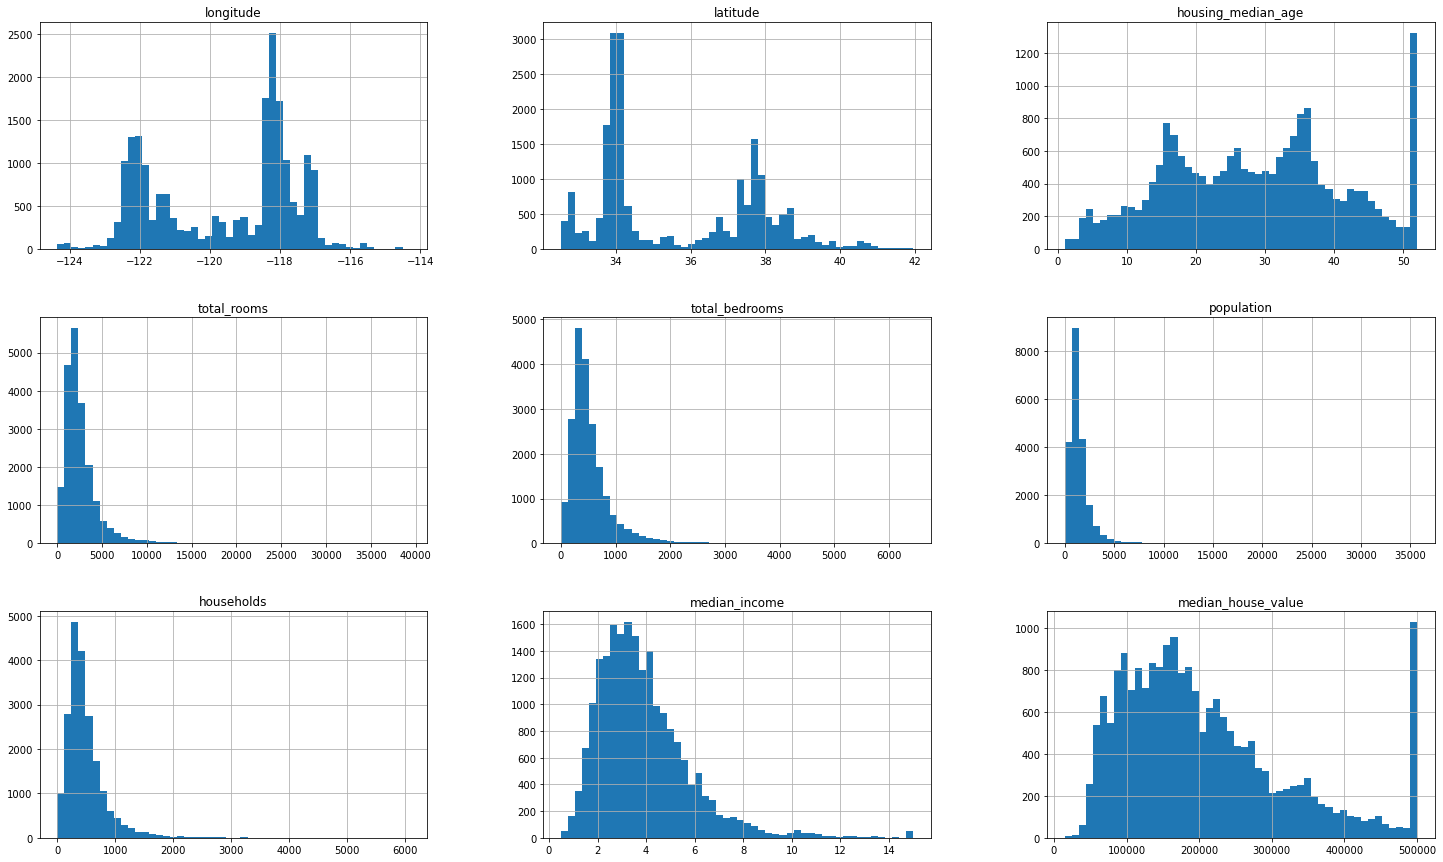

In [4]:
 
#import matplotlib.pyplot as plt
#plt.style.use('dark_background') 
  
housing.hist(bins=50, figsize = (25,15))
#plt.show()

## Nota

El método `hist()` se basa en Matplotlib. 

el atributo de ingreso medio (`median income`) no parece estar expresado en dólares estadounidenses (USD).

Después de consultar con el equipo que recopiló los datos, se le informa que los datos se han escalado y con un tope de 15 (en realidad, 15.0001) para ingresos medios más altos, y en 0.5 (en realidad, 0.4999) para ingresos medios más bajos. 

Los números representan aproximadamente decenas de miles de dólares (por ejemplo, 3 en realidad significa alrededor de $ 30,000). 

Trabajar con atributos preprocesados es común en Machine Learning, y no es necesariamente un problema, pero debe intentar comprender cómo se calcularon los datos.

También se limitaron 
* la edad media de la vivienda y 
* el valor medio de la vivienda. 

Este último puede ser un problema grave ya que es su atributo de destino (sus etiquetas). Sus algoritmos de aprendizaje automático pueden aprender que los precios nunca superen ese límite. 

Debe consultar con su equipo cliente (el equipo que use la salida de su sistema) para ver si esto es un problema o no. 

Si te dicen que necesitan predicciones precisas incluso más allá de undefined,000 $, entonces tiene dos opciones:

a. Reúna las etiquetas adecuadas para los distritos cuyas etiquetas fueron tapadas.  

b. Elimine esos distritos del conjunto de capacitación (y también del conjunto de prueba, ya que su sistema no debe evaluarse mal si predice valores más allá de $\$500,000$).

Estos atributos tienen escalas muy diferentes. Discutiremos esto más adelante en este capítulo, cuando exploremos el escalado de características.

Por último, muchos histogramas tienen una gran cola: se extienden mucho más a la derecha de la mediana que a la izquierda. 

Esto puede hacer que sea un poco más difícil para algunos algoritmos de aprendizaje automático detectar patrones. 

Intentaremos transformar estos atributos más adelante para tener más distribuciones en forma de campana.

Es de esperar que ahora comprenda mejor el tipo de datos que está tratando.

## Crear un conjunto de prueba

* solo ha echado un vistazo rápido a los datos, y   
* seguramente debería aprender mucho más sobre ellos antes de decidir qué algoritmos usar.

* Nuestro cerebro es un increíble sistema de detección de patrones,   
* lo que significa que es muy propenso a sobreajustarse: 
* si observa el conjunto de datos, puede proponer algún patrón aparentemente interesante en los **datos dados** que lo lleve a seleccionar un tipo particular de modelo de aprendizaje automático. 

* Cuando calcule el **error de generalización** utilizando el **conjunto de prueba**, generalmente encontrará que su estimación era demasiado optimista pues se dará cuenta que el modelo diseñadono **no** funciona tan bien como se esperaba. 


* La creación de un **conjunto de prueba** es teóricamente simple: 
* elija algunas instancias u observaciones al azar,
* generalmente el 20% del conjunto de datos 
* (o menos si su conjunto de datos es muy grande), y déjelas a un lado:

## Observemos que hace la función np.random.permutation() 

In [9]:
import numpy as np 
segmento_enteros = list(np.arange(3))
indices_revueltos = np.random.permutation(segmento_enteros)      
indices_revueltos

array([0, 2, 1])

In [11]:
np.random.permutation(3)

array([0, 2, 1])

# Construcción de función `dividir_entrenamiento_prueba` con metodología de desarrollo creciente

In [10]:
def dividir_en_entrenamiento_prueba(datos, porcentaje_prueba = 0.20):
    indices_barajados = np.random.permutation(len(datos)) 
    tamaño_conjunto_prueba = int(len(datos)*porcentaje_prueba)  
    indices_prueba = indices_barajados[:tamaño_conjunto_prueba]
    indices_entrenamiento = indices_barajados[tamaño_conjunto_prueba:]
    return datos.iloc[indices_entrenamiento], datos.iloc[indices_prueba] 

In [12]:
def dividir_en_entrenamiento_prueba(datos, porcentaje_prueba = 0.20):
    indices_barajados = np.random.permutation(len(datos))              # cálculo del número de instancias
    
    return indices_barajados

In [ ]:
dividir_en_entrenamiento_prueba(datos, porcentaje_prueba = 0.20)

In [ ]:
def dividir_en_entrenamiento_prueba(datos, porcentaje_prueba = 0.20):
    indices_barajados = np.random.permutation(len(datos)) 
    tamaño_conjunto_prueba = int(len(datos)*porcentaje_prueba)                # cálculo del número de instancias
    
    return tamaño_conjunto_prueba

In [ ]:
def dividir_en_entrenamiento_prueba(datos, porcentaje_prueba = 0.20):
    indices_barajados = np.random.permutation(len(datos)) 
    tamaño_conjunto_prueba = int(len(datos)*porcentaje_prueba)  
    indices_prueba = indices_barajados[:tamaño_conjunto_prueba]
    
    return indices_prueba 

In [ ]:
def dividir_en_entrenamiento_prueba(datos, porcentaje_prueba = 0.20):
    indices_barajados = np.random.permutation(len(datos)) 
    tamaño_conjunto_prueba = int(len(datos)*porcentaje_prueba)  
    indices_prueba = indices_barajados[:tamaño_conjunto_prueba]
    indices_entrenamiento = indices_barajados[tamaño_conjunto_prueba:]
    return indices_entrenamiento

In [13]:
def dividir_en_entrenamiento_prueba(datos, porcentaje_prueba = 0.20):
    indices_barajados = np.random.permutation(len(datos)) 
    tamaño_conjunto_prueba = int(len(datos)*porcentaje_prueba)  
    indices_prueba = indices_barajados[:tamaño_conjunto_prueba]
    indices_entrenamiento = indices_barajados[tamaño_conjunto_prueba:]
    return datos.iloc[indices_entrenamiento], datos.iloc[indices_prueba] 

Luego puede usar esta función utilizando asignación múltiple:

In [15]:
train_set, test_set = dividir_en_entrenamiento_prueba(housing) 

## Verificación del proceso de creación del test set

In [16]:
len(housing), len(train_set), len(test_set)   

(20640, 16512, 4128)

In [17]:
len(train_set)/len(housing), len(test_set)/len(housing)   

(0.8, 0.2)

* esto funciona, pero no es perfecto: 
* si ejecuta el programa nuevamente, ¡generará un conjunto de prueba diferente! 

Con el tiempo, usted (o sus algoritmos de aprendizaje automático) podrán ver el conjunto de datos completo, que es lo que desea evitar.

Una solución es guardar el conjunto de prueba en la primera ejecución y luego cargarlo en ejecuciones posteriores. 

In [18]:
train_set, test_set = dividir_en_entrenamiento_prueba(housing) 

In [19]:
train_set.to_csv('housing_train.csv', index = False)
test_set.to_csv('housing_test.csv', index = False)   

In [20]:
housing_train = pd.read_csv('housing_train.csv') 

In [21]:
len(housing_train)

16512

Otra opción es establecer la semilla del generador de números aleatorios (por ejemplo, con `np.random.seed(42)`) antes de llamar a `np.random.permutation()` para que siempre genera los mismos índices mezclados.

In [ ]:
import numpy as np 
import pandas as pd 
housing = pd.read_csv('housing.csv')

np.random.seed(42)          # Establecimiento de la semilla del generador


def dividir_en_entrenamiento_prueba(data, tasa_prueba = 0.2):
    indices_barajados = np.random.permutation(len(data)) 
    tamano_conjunto_prueba = int(len(data)*tasa_prueba)  
    indices_prueba = indices_barajados[:tamano_conjunto_prueba]
    indices_entrenamiento = indices_barajados[tamano_conjunto_prueba:]
    return data.iloc[indices_entrenamiento], data.iloc[indices_prueba] 

train_set, test_set = dividir_en_entrenamiento_prueba(housing)
test_set.head() 

Pero ambas soluciones se romperán la próxima vez que obtenga un conjunto de datos actualizado.

# Implementación de Scikit-Learn para dividir en conjunto de entrenamiento y prueba

Scikit-Learn proporciona algunas funciones para dividir conjuntos de datos en varios subconjuntos de varias formas.

La función más simple es `train_test_split()`, que hace prácticamente lo mismo que la función `dividir_en_entrenamiento_prueba(data, tasa_prueba = 0.2)`, con un par de características adicionales.

hay un parámetro `random_state` que le permite establecer la semilla del generador aleatorio.

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

Hasta ahora hemos considerado métodos de muestreo puramente aleatorios.

* En general, esto está bien si su conjunto de datos es lo suficientemente grande (especialmente en relación con la cantidad de atributos), 
* pero si no lo es, corre el riesgo de introducir un **sesgo de muestreo** significativo.

Cuando una empresa de encuestas decide llamar a 1.000 personas para hacerles algunas preguntas, no elige a 1.000 personas al azar en una guía telefónica.

Intentan asegurarse de que estas 1.000 personas sean representativas de toda la población.

* Por ejemplo, la población de EE. UU. es 51,3% de mujeres y 48,7% de hombres, 
* por lo que una encuesta bien realizada en los EE. UU. trataría de mantener esta proporción en la muestra: 513 mujeres y 487 hombres.

Esto se denomina muestreo estratificado:  

* la población se divide en subgrupos homogéneos llamados estratos, y se muestrea el número correcto de instancias de cada estrato para garantizar que el conjunto de prueba sea representativo de la población general.

Si las personas que realizan la encuesta utilizaran un muestreo puramente aleatorio, habría aproximadamente un 12% de posibilidades de muestrear un conjunto de pruebas sesgado que fuera menos del 49% de mujeres o más del 54% de mujeres.

De cualquier manera, los resultados de la encuesta estarían significativamente sesgados.

Suponga que conversó con expertos que le dijeron que el ingreso medio (`median_income`) es un atributo muy importante para predecir los precios medios de la vivienda.

Es posible que desee asegurarse de que el conjunto de prueba sea representativo de las diversas categorías de ingresos en todo el conjunto de datos.

Dado que el ingreso medio(`median_income`) es un atributo numérico continuo, primero debe crear un atributo de categoría de ingresos.

Observemos el histograma de ingresos medios más de cerca: la mayoría de los valores de ingresos medios se agrupan alrededor de 1,5 a 6 (es decir, de $ 15 000 a $ 60 000), pero algunos ingresos medios van mucho más allá de 6.